In [258]:
import networkx as nx
import pandas as pd

In [259]:
users = pd.read_csv('../userbase_builder/users.csv')

In [260]:
ts_connection = pd.read_csv('../userbase_builder/teacher_student_connections.csv')

source_col = 'user_id_teacher'
target_col = 'user_id_student'
edge_cols = ['subject', 'rating_avg_teacher']

G = nx.from_pandas_edgelist(ts_connection, source=source_col, target=target_col, edge_attr=edge_cols, create_using=nx.MultiDiGraph)
nx.set_node_attributes(G, users.set_index('user_id')['rating_avg'].to_dict(), 'rating_avg_teacher')

In [261]:
G.nodes(data = True)[806]

{'rating_avg_teacher': 1.9}

In [262]:
list(nx.simple_cycles(G, length_bound=6))

[[526, 16, 384, 379, 183, 887],
 [526, 16, 837, 352, 183, 887],
 [526, 366, 83, 379, 183, 887],
 [526, 366, 190, 379, 183, 887],
 [526, 366, 329, 379, 183, 887],
 [526, 428, 384, 379, 183, 887],
 [526, 428, 837, 352, 183, 887],
 [16, 302],
 [16, 302, 295, 145, 431],
 [16, 302, 295, 145, 433],
 [16, 302, 295, 145, 813],
 [16, 302, 295, 145, 837, 427],
 [16, 302, 295, 145, 837, 684],
 [16, 302, 295, 315, 445],
 [16, 302, 295, 315, 505, 355],
 [16, 302, 295, 315, 544],
 [16, 302, 295, 315, 766],
 [16, 302, 295, 315, 861, 355],
 [16, 302, 295, 355],
 [16, 302, 295, 355, 366, 636],
 [16, 302, 295, 355, 428, 431],
 [16, 302, 295, 355, 428, 433],
 [16, 302, 295, 355, 428, 813],
 [16, 302, 295, 420, 431],
 [16, 302, 295, 420, 433],
 [16, 302, 295, 420, 813],
 [16, 302, 295, 420, 837, 427],
 [16, 302, 295, 420, 837, 684],
 [16, 302, 366, 27, 17, 431],
 [16, 302, 366, 27, 17, 433],
 [16, 302, 366, 27, 17, 813],
 [16, 302, 366, 27, 249, 140],
 [16, 302, 366, 27, 249, 166],
 [16, 302, 366, 27, 249

In [267]:
USER_ID = 16

In [268]:
lst = []
for i, x in enumerate(list(nx.simple_cycles(G, length_bound=5))):
    if USER_ID in x:
        sum_of_weights = sum([G.nodes(data=True)[y].get('rating_avg_teacher') for y in x])
        print(x, sum_of_weights)
        lst.append((x, sum_of_weights))
        
lst = sorted(lst, key = lambda x : (len(x), x[1]))

[16, 302] 6.800000000000001
[16, 302, 295, 145, 431] 18.4
[16, 302, 295, 145, 433] 16.8
[16, 302, 295, 145, 813] 15.0
[16, 302, 295, 315, 445] 15.2
[16, 302, 295, 315, 544] 13.5
[16, 302, 295, 315, 766] 13.5
[16, 302, 295, 355] 12.2
[16, 302, 295, 420, 431] 18.2
[16, 302, 295, 420, 433] 16.6
[16, 302, 295, 420, 813] 14.8
[16, 302, 366, 27, 409] 16.4
[16, 302, 366, 100, 431] 16.1
[16, 302, 366, 100, 433] 14.5
[16, 302, 366, 100, 813] 12.7
[16, 302, 366, 636] 11.3
[16, 302, 366, 930, 445] 16.9
[16, 302, 366, 930, 544] 15.2
[16, 302, 366, 930, 766] 15.2
[16, 302, 428, 431] 14.9
[16, 302, 428, 433] 13.3
[16, 302, 428, 813] 11.5
[16, 302, 428, 837, 427] 14.4
[16, 302, 428, 837, 684] 14.6
[16, 302, 712, 145, 431] 19.2
[16, 302, 712, 145, 433] 17.6
[16, 302, 712, 145, 813] 15.8
[16, 302, 712, 315, 445] 16.0
[16, 302, 712, 315, 544] 14.3
[16, 302, 712, 315, 766] 14.3
[16, 302, 712, 355] 13.0
[16, 302, 712, 420, 431] 19.0
[16, 302, 712, 420, 433] 17.4
[16, 302, 712, 420, 813] 15.6
[16, 384, 45,

In [269]:
import matplotlib.pyplot as plt

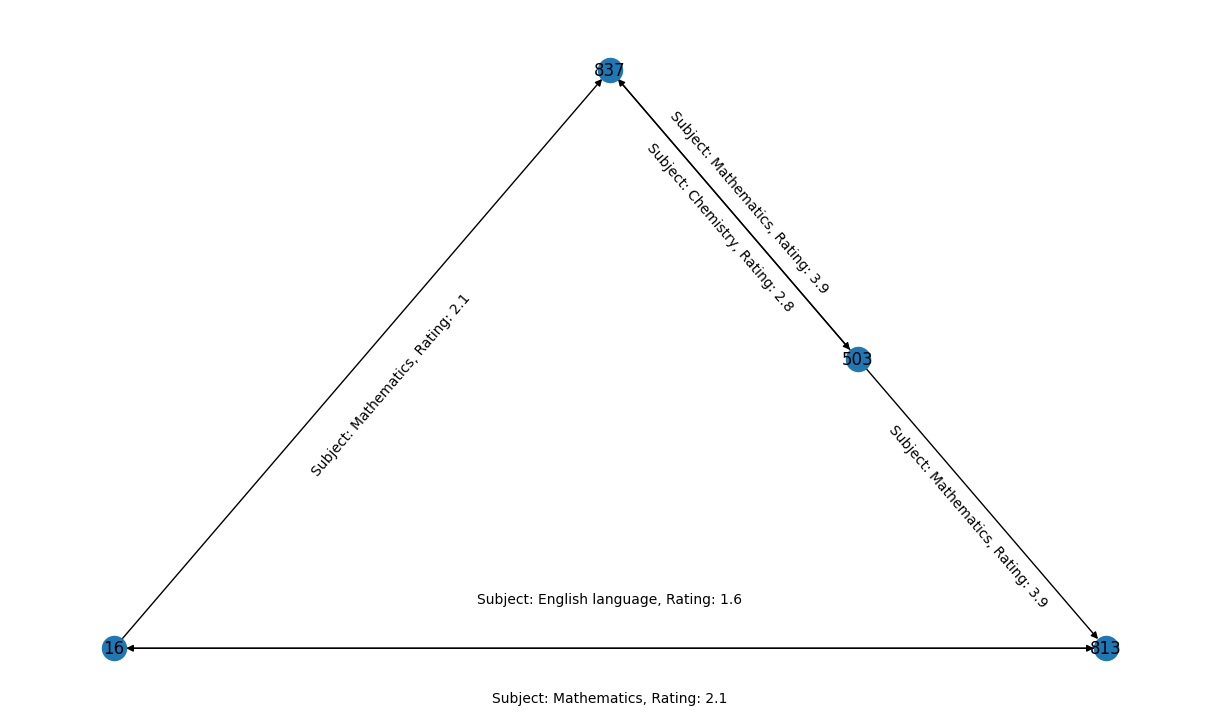

In [270]:
plt.figure(figsize=(12, 7))
sG = G.subgraph(lst[20][0])
#sG = []
pos = nx.planar_layout(sG)
nx.draw(sG, with_labels = True, pos = pos)
edge_labels = {(u, v): f"Subject: {d['subject']}, Rating: {d['rating_avg_teacher']}"
               for u, v, d in sG.edges(data=True)}

nx.draw_networkx_edge_labels(sG, pos = pos, edge_labels=edge_labels,  connectionstyle = 'arc3,rad=0.1');